<a href="https://colab.research.google.com/github/fawaid98/portfolio/blob/main/Forecasting_with_Brownian_Motion_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

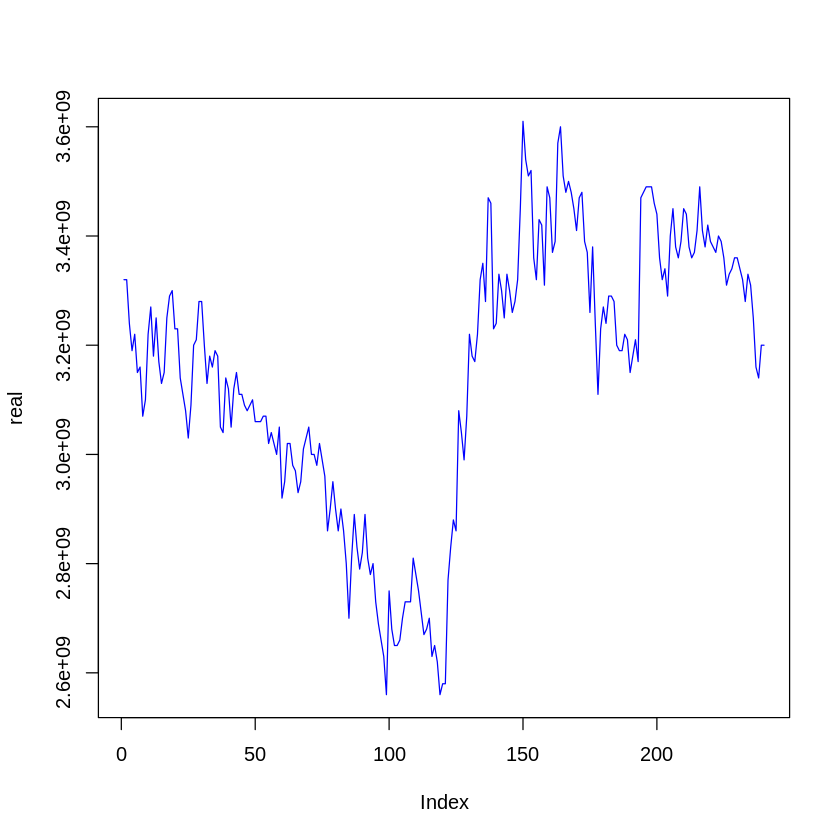

In [2]:
#Import Data
library(readxl)
close <- read_excel("/content/sample_data/CLose.xlsx")
real<-unname(unlist(close))

#Plot real
plot(real, type="l", col="blue")

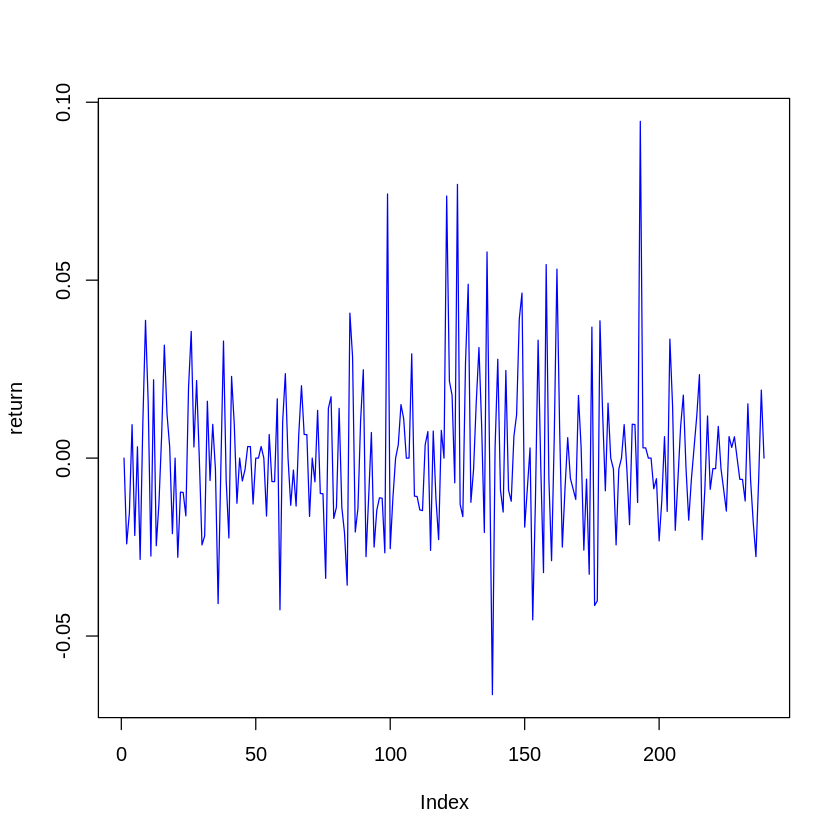

In [3]:
#Calculate Retun 
return <- numeric(length = length(real)-1)
for (i in seq_along(real)-1) {
  return[i] <- (real[i+1] - real[i])/real[i]
}

#Plot return
plot(return, type="l", col="blue")

In [4]:
#Return Shapiro-WIlk Test
miu<-mean(return)
sigma<-sd(return)
shapiro.test(return)

#Outlier Detection
outlier<-boxplot.stats(return)$out

#Remove Outlier
nrmlz<-return[!return %in% outlier]

#Normalized Shapiro-WIlk Test
miu<-mean(nrmlz)
sigma<-sd(nrmlz)
shapiro.test(nrmlz)


	Shapiro-Wilk normality test

data:  return
W = 0.94961, p-value = 2.272e-07



	Shapiro-Wilk normality test

data:  nrmlz
W = 0.99247, p-value = 0.2934



	Shapiro-Wilk normality test

data:  z
W = 0.99083, p-value = 0.1382


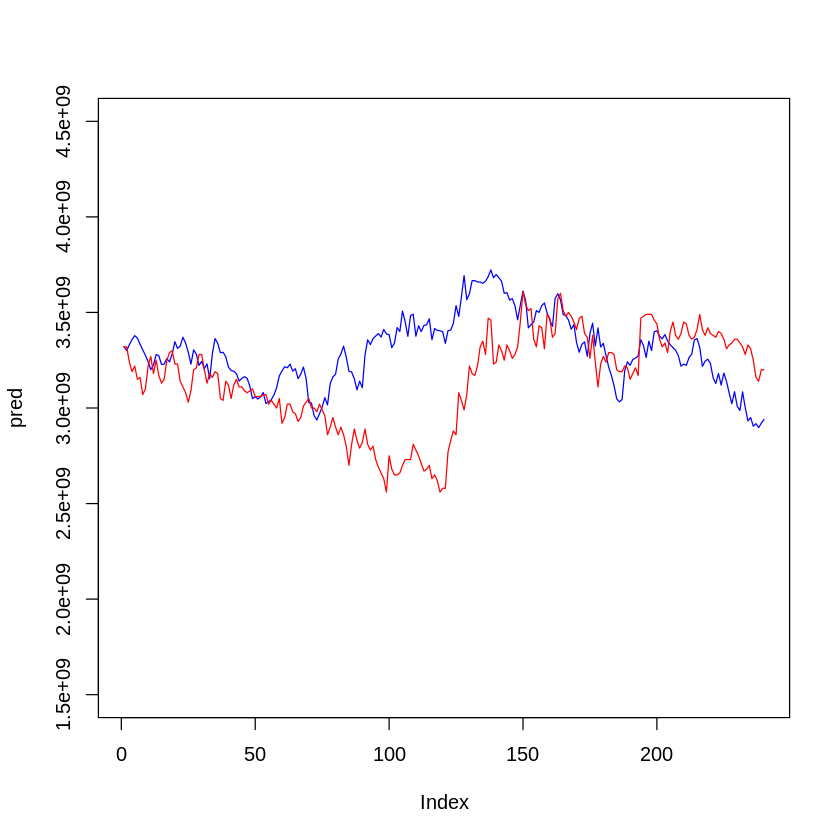

In [12]:
#Generate random normal number
z<- rnorm((length(real)-1), mean=0, sd=1)
shapiro.test(z)

#Brownian motion simulation
s1 <- numeric(length = length(z))
for (i in seq_along(z)) {
  s1[i] <- real[i]*exp(miu-(1/2*(sigma^2))+(sigma*z[i]))
}

for (i in seq_along(z)) {
  s1[i+1] <- s1[i]*exp(miu-(1/2*(sigma^2))+(sigma*z[i+1]))
}

pred <- c(real[1], s1[1:(length(s1)-1)])

#Plot Comparison
plot(pred, type="l", col="blue", ylim=c(1.5e+09,4.5e+09))
lines(real, type="l", col="red")

In [13]:
#MAPE Calculation
dif <- numeric(length = length(pred))
for (i in seq_along(pred)) {
  dif[i] <- abs((real[i]-pred[i])/real[i])
}

MAPE<-mean(dif)*100
MAPE


[1] 8.190529